# Static visualizations

This material describes the most frequently used solutions to produce static plots (e.g. for publications). We focus on:

1. how to use built-in methods of pandas and xarray
2. how to customize the plots using the low-level matplotlib library.
3. how to produce some useful high-level plots using the seaborn library.

Note that matplotlib is used internally in approaches 1 and 3 and quite often a combination
is the fastest way to achieve your goals.

*Partly based on the [Lectures on scientific computing with Python](https://github.com/jrjohansson/scientific-python-lectures)*
by Robert Johansson (under CC 3.0) and the [Matplotlib tutorial]()

## Data preparation

For this lesson, we will use a nice dataset consisting of size measurements 
for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.
These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program,
part of the US Long Term Ecological Research Network.

We already know the `pandas` library, so let's use it for data loading:



In [2]:
import pandas as pd

penguins = pd.read_csv("data/penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


We also fake one HiLASE 10-ns laser time profile seen in the depths of Google search (the code is
not important and it is not the most efficient one):

In [3]:
import xarray as xr
import numpy as np

n_points = 100

time = np.linspace(0, 20, n_points)
intensity = []
for t in time:
    if t < 3 or t > 12.5:
        x = 0
    elif t < 3.5:
        x = 2 * (t - 3)
    elif t < 12:
        x = 1
    else:
        x = 2 * (12.5 - t)
    x += 0.05 * np.random.rand()
    intensity.append(x)

laser_profile = xr.DataArray(
    intensity,
    dims=("t",),
    coords={"t": time * 1e-9}
)
laser_profile


<xarray.DataArray (t: 100)>
array([0.00175708, 0.02034975, 0.01870497, 0.02918675, 0.0314332 ,
       0.04490422, 0.02252601, 0.04336773, 0.04524644, 0.01866651,
       0.03748478, 0.017261  , 0.04261233, 0.04128863, 0.04052751,
       0.06748943, 0.4940628 , 0.86978907, 1.0000468 , 1.0114574 ,
       1.01991112, 1.0328067 , 1.04759207, 1.03694249, 1.01113153,
       1.03849764, 1.01303692, 1.00231318, 1.03431282, 1.04975852,
       1.03231959, 1.01198724, 1.04804992, 1.0363778 , 1.00584677,
       1.01337902, 1.00835353, 1.03973405, 1.03137456, 1.02670822,
       1.04539824, 1.02716648, 1.01316081, 1.01228501, 1.03635657,
       1.00412266, 1.01439077, 1.00087106, 1.04288542, 1.04011462,
       1.02429701, 1.0201075 , 1.04582759, 1.00441311, 1.02058575,
       1.0294915 , 1.01841906, 1.03791907, 1.00257787, 1.00389948,
       0.80461018, 0.37763485, 0.04009519, 0.04446499, 0.02042399,
       0.04440727, 0.04534343, 0.02502428, 0.0301954 , 0.01399084,
       0.00239513, 0.04674586, 0.0458828 , 0.03705389, 0.0152813 ,
       0.04933999, 0.04975744, 0.03065759, 0.03712408, 0.02372017,
       0.02607935, 0.00940166, 0.01288103, 0.00447267, 0.02798964,
       0.00878607, 0.04845672, 0.03473246, 0.00312106, 0.04059181,
       0.00411537, 0.04705506, 0.02469996, 0.01519046, 0.01339556,
       0.02942233, 0.02332906, 0.02138178, 0.03508085, 0.04804258])
Coordinates:
  * t        (t) float64 0.0 2.02e-10 4.04e-10 ... 1.96e-08 1.98e-08 2e-08

In [4]:
laser_profile_df = pd.DataFrame({
    "t": time * 1e-9,
    "intensity": intensity
})

## First plots

### In pandas

You may remember that basic plotting of pandas' DataFrames is not difficult; the [`DataFrame.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)
attribute can be used as a method (where the type of plot is specified by the `kind` parameter) or as a proxy to several submethods (`.plot.scatter`, `.plot.line`, ...):



<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

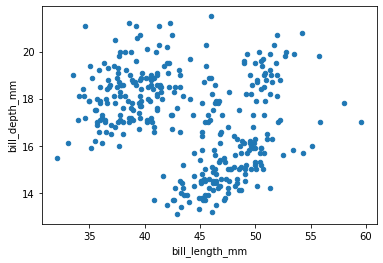

In [5]:
penguins.plot(
    x="bill_length_mm",    # Name of the column for horizontal axis
    y="bill_depth_mm",     # Name of the column for vertical axis
    kind="scatter"
)

AttributeError: 'PathCollection' object has no property 'hue'

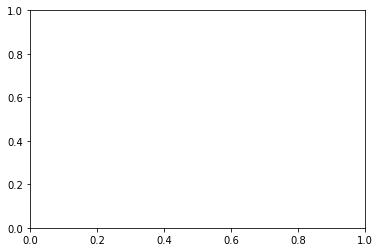

In [15]:
penguins.plot(
    x="bill_length_mm",    # Name of the column for horizontal axis
    y="bill_depth_mm",     # Name of the column for vertical axis
    hue="species",
    kind="scatter"
)

Apart from this, pandas offers nine other basic plot types to visualize
one or more variables: 

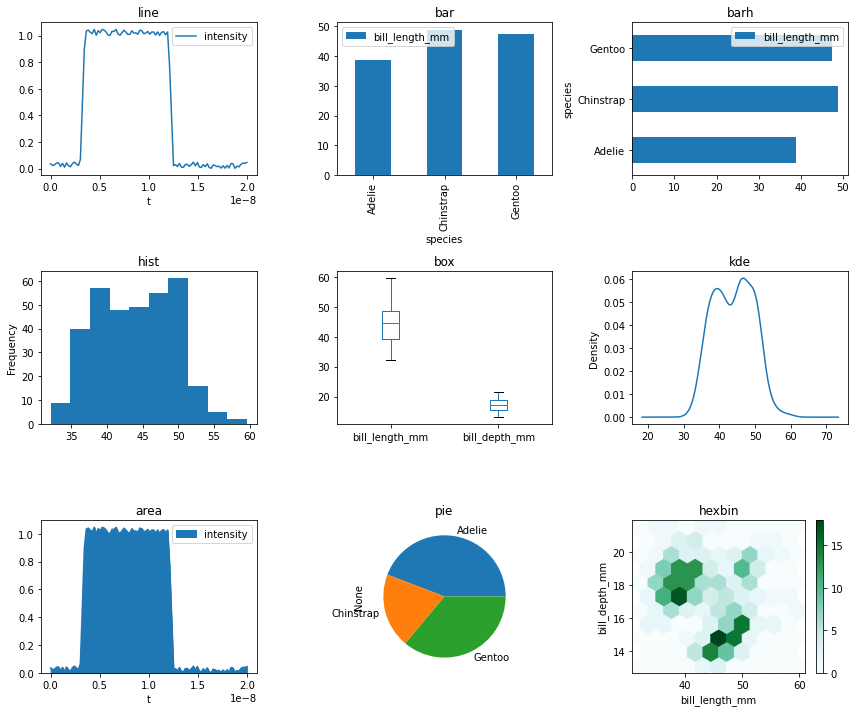

In [ ]:
# Prepare a grid for nine plots
fig, ax = plt.subplots(3, 3, figsize=(12, 10))

# Nine different plots
laser_profile_df.plot.line(x="t", y="intensity", ax=ax[0][0], title="line")
penguins.groupby("species").mean().plot.bar(y="bill_length_mm", ax=ax[0][1], title="bar")
penguins.groupby("species").mean().plot.barh(y="bill_length_mm", ax=ax[0][2], title="barh")
penguins["bill_length_mm"].plot.hist(ax=ax[1][0], title="hist")
penguins[["bill_length_mm", "bill_depth_mm"]].plot.box(ax=ax[1][1], title="box")
penguins["bill_length_mm"].plot.kde(ax=ax[1][2], title="kde")
laser_profile_df.plot.area(x="t", y="intensity", ax=ax[2][0], title="area")
penguins.plot.hexbin(x="bill_length_mm", y="bill_depth_mm", ax=ax[2][2], gridsize=10, title="hexbin")
penguins.groupby("species").size().plot.pie(ax=ax[2][1], title="pie")

# Make them fit nicely together
fig.tight_layout()




For more information about pandas plotting, see the [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) page from the official documentation.

### In xarray

DataArrays and Datasets have the `.plot` attribute too, working as 

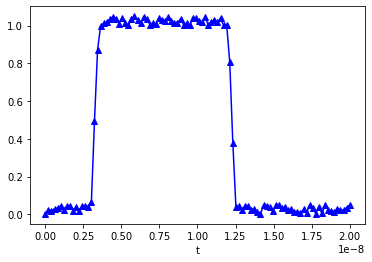

In [13]:
laser_profile.plot.line("b-^")  # Customize the line & point

**Spoiler alert!** This actually calls creates a matplotlib figure and axes and uses their plotting
methods to do actual drawing. We might as well produce the same plot relying on matplotlib itself
(note the less semantic and more extensive code):

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

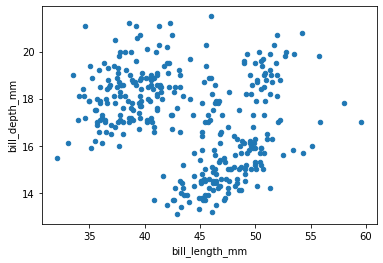

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()           # Create your drawing area

ax.scatter(
    penguins["bill_length_mm"],    # Not a name, but Series
    penguins["bill_depth_mm"],
    s=20                           # The default circle differs
)

ax.set_xlabel("bill_length_mm")    # Not taken from Series
ax.set_ylabel("bill_depth_mm")
ax

## Vivisection of the plot

![Anatomy](images/mpl-anatomy.png)

![Picture title](images/mpl_cheatsheet.png)

(from https://github.com/rougier/matplotlib-cheatsheet by Nicolas Rougier)

## Exporting a plot

This procedure works 

TODO:
- text properties (latex)
- animations
- export the plot

## What was not covered

(among others...)

- advanced plots in pandas ()
- geographical plots in xarray
- animations

## Further reading and videos

- [Matplotlib examples](https://matplotlib.org/gallery/index.html)
- [Matplotlib tutorials](https://matplotlib.org/tutorials/index.html)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=77a5caea-ff40-471d-8b4b-98dc66dd30c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>